# Chustomer Churn Prediction
## Project Overview
A Data from the Telco DomainDue to tough competition the customers tend to swtich between the telecommunication service providersE.gan Airtel customer might transition to Jio services and vice versaThis behaviour from the customers is known as churn.

## Objective
To be able to predict if a customer would churn or notTake the Next Best Action to prevent churn.

## Stages to be convered during the solution
- `Data Merging and Wrangling:` Combining multiple data sources and cleaning the data
- `Exploratory Data Analysis:` Understanding the relationship between features and with target
- `Data Preprocessing:` Data Encoding, Missing Value Treatment, Outlier Treatment, Feature Scaling
- `Model Building:` Train ML Model using the pre-processed data
- `Evaluation:` Assess the Model's performace

By the end of this project, you will have a complete workflow for predicting churn and/or creating classification models.


## Domain Backgroud (Telecom Churn Stroy)

I’m working as a data analyst at a telecommunications company, which I refer to as TeleComCoTeleComCo provides phone and internet services to a wide range of customers, and, as with most telecoms, customer churn—when customers stop using our service—is a key concernHigh churn rates lead to lost revenue and may signal customer dissatisfaction.

Recently, in the last quarter, we noticed a rise in customers leaving for competitorsIn response, our management tasked my team with investigating the reasons behind this churn and developing a model to predict which customers are most at risk of leavingThe purpose is to identify these customers in advance and proactively offer them incentives to stay.

For this project, I’ve been given a dataset detailing account information for both past and current customers, along with data indicating whether or not each customer eventually churnedMy primary responsibilities include:
- Analyzing this dataset to detect patterns and factors associated with customer churn.
- Building a predictive model (specifically using logistic regression) to estimate churn risk for individual customers.
- Through this data exploration, I expect to identify patterns such as:
- Customers with longer tenures are generally less likely to churn, while newer customers may be at greater risk.
- Those with certain types of plans or higher monthly charges might be more inclined to leave, possibly due to the cost factor.
- Demographic details could influence churn—for instance, senior citizens may use our services differently or have specific needs.

Customer preferences, like opting for paperless billing or bundling phone and internet, might also relate to their likelihood of churning.
By thoroughly investigating these factors and building the predictive model, we aim to help TeleComCo understand why customers leave and reduce future churn through timely interventions.

## Dataset Description

The dataset consists of customer records, each with a variety of features describing the customer and their service usage. Below is an overview of each column in the data:
- `customer_id:` A unique identifier for each customer (e.g., a UUID). This is just an ID and not useful for prediction.
- `customer_email:` The email address-of the customer. This is an identifier as well and not directly useful for the model.
- `age:` The age of the customer (in years). This could be related to churn if different age groups have different service preferences.
- `senior_citizen:` Whether the customer is a senior citizen or not (boolean: true/false). Typically, this might be derived from age (e.g., age > 65).
- `partner:` Whether the customer has a partner or not (boolean). This indicates if the customer is married or in a long-term partnershipIn telecom, having a partner
might mean family plans or shared services.
- `dependents:` Whether the customer has dependents (children or other dependents) or not (boolean) Customers with dependents might have different usage (e.g.,family plans).
- `tenure_months:` The number of months the customer has been with the company. Higher tenure might indicate loyalty; low tenure customers are newer and might be more likely to churn if they haven't established loyalty.
- `phone_service:` Whether the customer has phone service with the company (boolean). Some customers might only have internet service; this feature tells if they also subscribed to phone.
- `paperless_billing:` Whether the customer has opted for paperless billing (boolean). This could be a proxy for tech-savvy behavior or convenience preference.
- `monthly_charges:` The amount `$` charged to the customer every month. This is like their monthly bill. Customers with higher bills might churn due to cost, or those with very low bills might churn if they are not using many services.
- `total_charges:` The total amount `$` the customer has been charged since joining (this is roughly monthly_charges * tenure, plus any extras). This can indicate the overall value of the customer; low total charges might mean the customer is relatively new or has a low-cost plan.
- `churn:` The target variable - whether the customer has churned (true = yes, the customer left; false = no, the customer is still with the company). This is what we want to
predict.
- `last_interaction_date:` The date of the last interaction with the customer (could be the last service use or last customer support call, etc.). This might give insight into how recently the customer was active. Customers with very old last interactions might have silently churned.
- `region:` The geographic region or state where the customer resides (e.g., Ohio, California, etc.). Different regions might have different market conditions or competitor
presence, possibly affecting churn.
- `signup_date:` The date when the customer originally signed up for service. (Note: This column is present in one of the source files. When we merge data, some records might not have a signup_date if it wasn't recorded for them.)



## Potential Questions and Considerations:

Based on the above features, here are some questions that might arise and that we will explore in this project:
- Do older customers or senior citizens tend to churn more or less than younger customers?
- Does having a partner or dependents influence churn? (For example, do single customers churn more often than those with family plans?)
- How does tenure relate to churn? Are newer customers more likely to leave compared to long-term customers?
- What about monthly charges? Are customers with high monthly charges more likely to churn (perhaps due to higher cost), or could it be that those with low charges churn because they might not be fully utilizing the service?
- Are there any regional trends in churn? (We might check if certain regions have higher churn rates.)
- How do features like phone service or paperless billing correlate with churn? (e.g., maybe paperless billing users are more engaged or maybe less personal interaction leads to higher churn?)
- Are there outliers or unusual values in charges or tenure that need special attention?
  
`Try to answer these questions step-by-step in the analysis below.`

### Task 0: Import required libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# to tell python to show the pyplot in the outplut seciton of the cell
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Task 1: Combine the two datasets
The customer data is provided in two CSV files (say, Customer Churn_data.cv and Customer Churn data_2.cv). Load both files and combine them into a single pandas
DataFrame for analysis. The two files have the same columns (one file may have an extra column signup_date). Ensure that after merging, all columns are aligned correctly.

In [2]:
file1 = pd.read_csv("Customer_Churn_data.csv")
print(file1.shape)
file1.head(2)

(100000, 14)


,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
0,0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Preston.Cartwright54@hotmail.com,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16T21:32:39.602Z,Ohio
1,0e0237a0-dc14-4610-9c74-5f50d72dd00a,Agustin_Treutel@yahoo.com,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11T09:46:16.708Z,Oklahoma


In [3]:
file2 = pd.read_csv("Customer_Churn_data_2.csv")
print(file2.shape)
file2.head(2)

(100000, 15)


,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
0,132dcfb5-759a-4640-9156-79319d71b7f1,Jarod_Heidenreich@yahoo.com,62,False,True,True,28,True,False,129.603120,2285.999558,False,2024-09-19T04:01:17.383Z,Virginia,2023-04-23T21:52:19.052Z
1,c560d179-94a5-487a-9fd6-b1174fea339f,Julianne67@gmail.com,64,False,True,True,6,False,False,27.488638,5045.149417,False,2024-12-08T06:33:58.864Z,Pennsylvania,2022-01-03T16:36:13.193Z


### Task 2: View the first few rows of the combined data

After merging, use the DataFrame's head© method to display the first 5 rows of the combined dataset. This will help verify that the data from both files has been concatenated
correctly and that columns are as expected.

In [4]:
data = pd.concat([file1, file2], ignore_index=True)
data.sample(5)

,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
37405,677446c9-d44c-4efb-b673-943b06447f3a,Nels_Brown68@hotmail.com,53,True,False,False,24,True,True,103.259610,4299.516796,True,2024-10-18T09:41:38.896Z,Michigan,NaN
50166,f81ba3d2-d230-46a8-9c5e-26bee2cabb7c,Noble_Rice-Koelpin61@hotmail.com,55,True,True,True,60,False,False,104.299059,4137.201368,False,2025-01-28T05:59:08.247Z,Ohio,NaN
99490,7ddd15c3-fe2e-49ae-b91f-edb0cbe8534c,Paris.Ratke@yahoo.com,51,False,True,True,16,True,True,100.736457,623.204024,False,2025-07-10T10:07:19.575Z,Michigan,NaN
56257,963717ff-0c48-4cca-b348-f39c195b8bd1,Cordie71@hotmail.com,46,True,False,False,8,True,True,64.950399,2517.431507,False,2024-10-23T21:30:50.432Z,Vermont,NaN
185119,1b3cb7d5-6faf-4de8-89c3-c43490b59e6f,Naomie.Kautzer60@yahoo.com,74,False,True,True,32,True,True,120.957413,683.628919,True,2024-12-02T20:41:25.666Z,South Carolina,2022-10-22T15:14:10.657Z


### Task 3: Understand the dataset dimensions and dtypes
Determine the size of the combined dataset. Find out how many rows and columns are present. This can be done using the DataFrame's .info0 method. This will show the data type of each column and whether there are any missing values (non-null counts) in each column. Verfy that numeric columns are correctly recognized (e.g. age.
tenure months should be int or float, charges should be float, churn and otner booleans might appear as bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            200000 non-null  object 
 1   customer_email         200000 non-null  object 
 2   age                    200000 non-null  int64  
 3   senior_citizen         200000 non-null  bool   
 4   partner                200000 non-null  bool   
 5   dependents             200000 non-null  bool   
 6   tenure_months          200000 non-null  int64  
 7   phone_service          200000 non-null  bool   
 8   paperless_billing      200000 non-null  bool   
 9   monthly_charges        200000 non-null  float64
 10  total_charges          200000 non-null  float64
 11  churn                  200000 non-null  bool   
 12  last_interaction_date  200000 non-null  object 
 13  region                 200000 non-null  object 
 14  signup_date            100000 non-nu

`Verify if the data has been loaded perfectly`

In [6]:
# last_interaction_date --> convert to datetime
data['last_interaction_date'] = pd.to_datetime(data['last_interaction_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

In [7]:
# signup_date --> convert into correct datatype (datetime)
data['signup_date'] = pd.to_datetime(data['signup_date']) #infer_datetime_formate=True --> to handle mixed formats in a single col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

### Task 4: Generate summary statistics
Use the .describe() method on the DataFrame to get summary statistics for the numeric columns (count, mean, std, min, quartiles, max). This will give an overview of the
distributions (e.g., average age, average tenure, min/max charges, etc.).

In [8]:
data.describe(include=object)

,customer_id,customer_email,region
count,200000,200000,200000
unique,200000,197332,50
top,0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Emerson28@gmail.com,North Dakota
freq,1,4,4180


In [9]:
data.describe(include=int)

,age,tenure_months
count,200000.000000,200000.000000
mean,54.031670,35.976150
std,21.048897,21.053301
min,18.000000,0.000000
25%,36.000000,18.000000
50%,54.000000,36.000000
75%,72.000000,54.000000
max,90.000000,72.000000


In [10]:
data.describe(include=float)
# tenure*monthly charges = total_charges

,monthly_charges,total_charges
count,200000.000000,200000.000000
mean,76.618568,4006.213781
std,34.891140,2303.960157
min,18.000333,18.027625
25%,46.902328,2015.261182
50%,75.754153,3999.740393
75%,104.441355,6001.846181
max,149.998856,7999.994083


In [11]:
data.describe(include=bool)

,senior_citizen,partner,dependents,phone_service,paperless_billing,churn
count,200000,200000,200000,200000,200000,200000
unique,2,2,2,2,2,2
top,True,False,False,False,True,True
freq,100054,100001,100202,100043,100117,100013


In [12]:
data.describe(include=['datetimetz'])

,last_interaction_date,signup_date
count,200000,100000
mean,2025-02-02 21:13:13.894031872+00:00,2023-02-03 04:16:50.602242048+00:00
min,2024-08-04 12:54:19.943000+00:00,2020-08-05 13:04:51.741000+00:00
25%,2024-11-03 17:43:17.303000064+00:00,2021-11-04 20:06:11.245750016+00:00
50%,2025-02-02 22:44:00.503000064+00:00,2023-02-01 14:36:04.458499840+00:00
75%,2025-05-05 08:50:22.581000192+00:00,2024-05-02 17:46:17.339500032+00:00
max,2025-08-04 12:49:38.839000+00:00,2025-08-04 11:36:35.778000+00:00


### Task 5: Check for duplicate entries
Ensure there are no duplicate customer records in the data. For instance, verify if customer_id is unique across the combined dataset. You can use pandas functions like
.duplicated() on the customer_id column to check for any duplicates.

In [13]:
data['customer_id'].duplicated().sum() #number of duplicated rows in the given col/df

0

In [14]:
data.duplicated().sum() # number of duplicated rows in the given df

0

In [15]:
data.sample(3)

,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
195488,87adb724-ccea-427b-8e6c-a245e83ddfcf,Clementine_Macejkovic7@hotmail.com,35,False,True,True,50,True,False,69.385293,3465.448052,False,2025-06-29 15:53:44.830000+00:00,Georgia,2021-04-07 21:07:30.819000+00:00
108314,2dba54f2-568c-4f20-93ab-abcb2a9510c0,Janick94@hotmail.com,56,False,True,False,21,True,True,24.702020,2284.389586,False,2025-04-25 13:46:08.112000+00:00,Louisiana,2024-10-11 05:45:32.088000+00:00
87650,cdb441c1-739e-4f99-bdcd-411f7b9940ee,Tania_Yundt4@gmail.com,43,False,False,False,71,True,False,27.093051,1205.557099,True,2025-03-04 21:01:15.670000+00:00,New Hampshire,NaT


### Task 6: Identify missing values
Identify if there are any missing values in the dataset and in which columns. Use methods like .isnull().sum() to get the count of null or NaN values per column. This will highlight columns that need attention (e.g., we expect many missing in signup_date if one file lacked it).

In [16]:
data.isnull().sum()

customer_id                   0
customer_email                0
age                           0
senior_citizen                0
partner                       0
dependents                    0
tenure_months                 0
phone_service                 0
paperless_billing             0
monthly_charges               0
total_charges                 0
churn                         0
last_interaction_date         0
region                        0
signup_date              100000
dtype: int64

<Axes: >

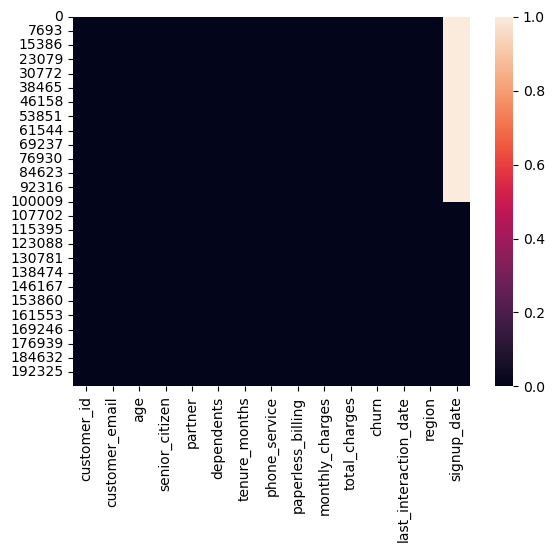

In [17]:
sns.heatmap(data.isnull())

### Task 7: Analyze the pattern of missing data
- Examine the missing data pattern and determine the likely mechanism: - Are the missing values MCAR (Missing Completely at Random) - i.e., no identifiable pattern, just
random? - Or MAR (Missing At Random) - i.e., the missingness is related to some other observed data? - Or MNAR (Missing Not at Random) - i.e., the missingness has a
pattern related to the unobserved value itself or is systematically absent for a particular subset?

- Question: Based on the columns with missing data, what type of missingness do you suspect? For example, if signup_date is missing for all customers from one file, that's a systematic pattern (likely MNAR or a data collection issue). Document your reasoning. --> It is not missing at random, it is missing on purpose.

### Task 8: Handle missing values
- Decide on a strategy to handle the missing data identified above. For instance: - If a column has too many missing values (or is not crucial), you might choose to drop that column. - If only a few records have missing values, you might choose to fill (impute) them with an appropriate value (mean, median, mode, or a special indicator).
- Apply the chosen strategy. For example, if signup_date is missing for a large portion and not critical to the analysis, you might drop the signup_date column to simplify the
dataset.

### Task 9: Drop unneeded columns
- There are some columns that are not useful for predicting churn and could be removed to simplify the analysis. Typically, identifier columns like customer_id and customer_email do not have predictive value. Also, if we have decided not to use certain columns (like dates or any others) for modeling, we can drop them as well to avoid clutter.
- Remove the following: - customer_id and customer_email (identifiers) - last_interaction_date (a date field that we will not use in the model for now, to keep things simple) -
signup_date (if you did not drop it already in the missing data step)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

In [19]:
data.set_index('customer_id', inplace=True) # we can choose to make cols with all unique values as row index for better reference 

In [20]:
data.sample(4)

,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
customer_id,,,,,,,,,,,,,,
ffe4eae9-5410-42bd-975c-a2dbd2b2eacf,Damion.Waelchi@yahoo.com,50,True,True,False,15,False,True,73.907340,3533.843083,False,2024-08-30 05:40:46.935000+00:00,Nevada,2024-02-06 22:09:24.306000+00:00
0300d5a1-9bde-4744-ba94-ca53f2fcaf98,Jovan55@gmail.com,68,False,True,True,24,False,True,126.217978,2571.352328,True,2025-01-24 07:23:07.153000+00:00,Indiana,2021-01-01 12:22:14.905000+00:00
699ee820-a9fb-4838-81fe-a32f5cadbe53,Alek_Wuckert30@gmail.com,29,True,True,True,47,False,False,36.914122,3511.877067,True,2025-06-19 20:13:58.204000+00:00,Virginia,NaT
f2183178-7203-4533-86b5-1a09a35c59f4,Raleigh_Stracke@yahoo.com,18,True,True,False,50,False,False,43.983191,843.125157,True,2024-11-10 21:18:33.695000+00:00,Kansas,NaT


In [21]:
# since email is  a PII (Personal Information Identifier) it should never be used as a machine learning feature
# since there is no logic to replace/fill the missing values for signup_date, we would drop the column
print(data.shape)
data.drop(['customer_email', 'signup_date'], axis=1, inplace=True)

(200000, 14)


In [22]:
print(data.shape)
data.sample(3)

(200000, 12)


,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
customer_id,,,,,,,,,,,,
3a00cf1c-bcfa-475f-b7e0-61372fba22e5,67,True,True,True,16,False,False,44.415328,5558.882604,True,2024-10-01 18:32:16.234000+00:00,Mississippi
ac6fbf23-2b49-4ec1-9408-580ee1d08767,61,True,False,True,13,False,False,111.594316,5100.171176,True,2025-04-15 02:30:02.715000+00:00,New Mexico
2aa4b7ce-554b-4e1e-9078-71be4fc0ac50,33,True,True,False,21,True,True,88.389173,7788.417836,False,2025-03-13 02:24:14.052000+00:00,Wisconsin


In [23]:
# RFM modeling --> Recency (How recent), Frequency (How frequent), Monitory (How much pay)
# here in the data: last_interaction_date is Recency, tenure_months is Frequency and total_charges is Monitory

## Exploratory Data Analysis (EDA)
Now that the data is clean and prepared, let's perform some exploratory analysis to understand the data better and to gather insights about what factors might affect churn.
We will look at the distribution of variables and relationships between features and the churn outcome.

### Task 10: Examine the distribution of the target variable (Churn)

Let's see how many customers in our dataset churned vs. stayed. Plot a count of churned vs non-churned customers. This can be done using a bar plot (or simply checking the value counts). This will tell us the balance of our classes (churn vs no churn).

<Axes: xlabel='churn'>

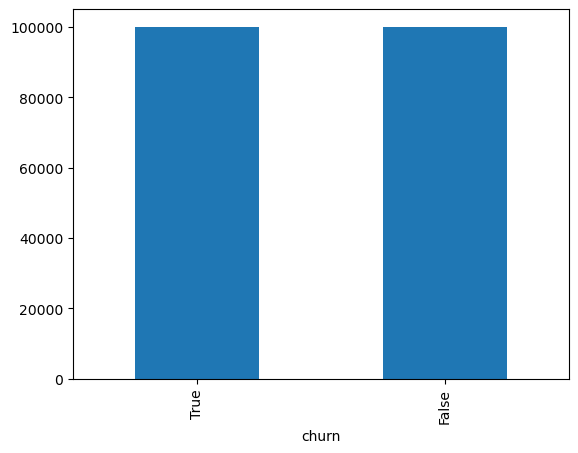

In [24]:
data.churn.value_counts().plot(kind='bar') # We have a balanced data set with 50:50 rows for both calsses

### Task 11: Distribution of customer ages
Plot a histogram of the age of customers. This will show the distribution of customer ages. Are most customers in a certain age range? This might help identify if our customer
base is younger or older on average.

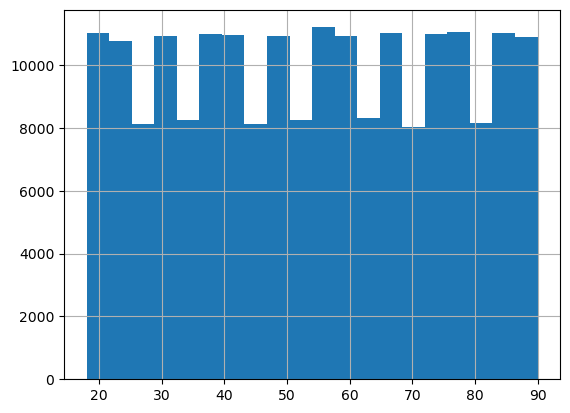

In [25]:
data.age.hist(bins=20) # The age distribution seems to be uniformly distributed
plt.show()

<Axes: >

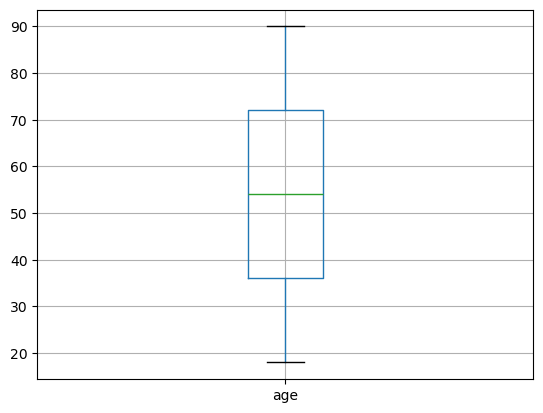

In [26]:
data.boxplot('age')

In [27]:
data.age.describe()

count    200000.000000
mean         54.031670
std          21.048897
min          18.000000
25%          36.000000
50%          54.000000
75%          72.000000
max          90.000000
Name: age, dtype: float64

### Task 12: Distribution of customer tenure
Plot a histogram of the tenure_months to see how long customers tend to stay with the company. Is there a large number of new customers (low tenure) in the data? Do we see many customers at the maximum tenure (72 months, if that's the max)? Understanding tenure distribution will help in analyzing churn by tenure later.

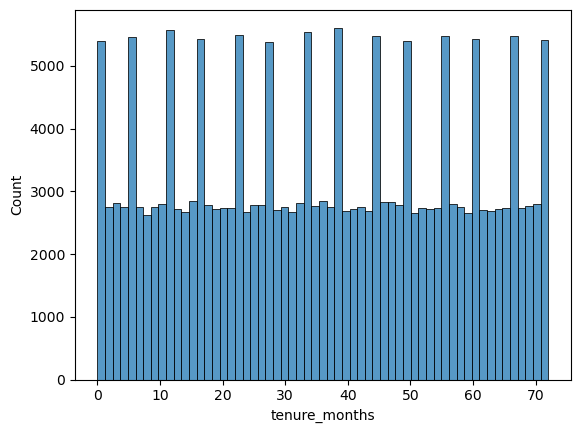

In [28]:
sns.histplot(data.tenure_months)
plt.show()

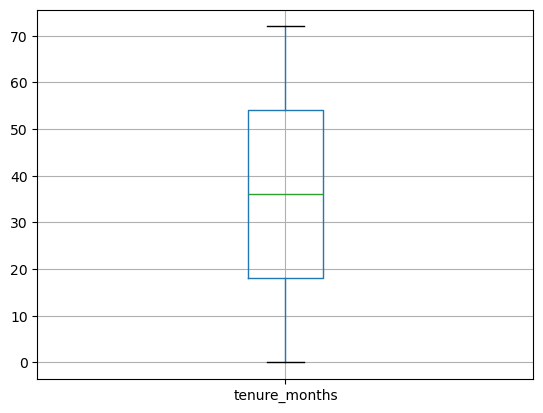

In [29]:
data.boxplot('tenure_months')
plt.show()

In [30]:
data.tenure_months.describe()

count    200000.000000
mean         35.976150
std          21.053301
min           0.000000
25%          18.000000
50%          36.000000
75%          54.000000
max          72.000000
Name: tenure_months, dtype: float64

In [31]:
data.tenure_months.value_counts()

tenure_months
36    2848
15    2847
46    2827
47    2825
39    2824
      ... 
59    2663
27    2662
6     2653
49    2636
8     2627
Name: count, Length: 73, dtype: int64

- `Analysis: we can see customers who have spent time over the full range. Uniform distribution`
- `incase of uneven dist we can transform the variable into categories like new, <3M, <6M, <1Y, <2Y..`

### Task 13: Distribution of monthly charges
Plot a histogram of the monthly_charges. This shows the distribution of monthly billing amounts. We can see the range of charges and if it's skewed (e.g., many customers at lower tiers vs higher tiers). Sometimes, very high or very low charges could influence churn.

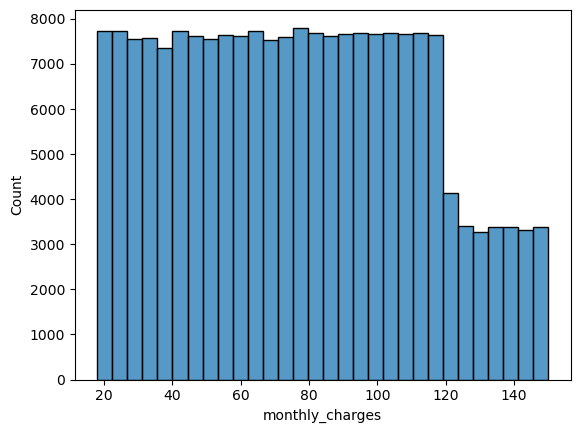

In [32]:
sns.histplot(data.monthly_charges, bins=30) 
plt.show()

`Analysis: comparively the high paying customers are less in number`

<Axes: ylabel='Density'>

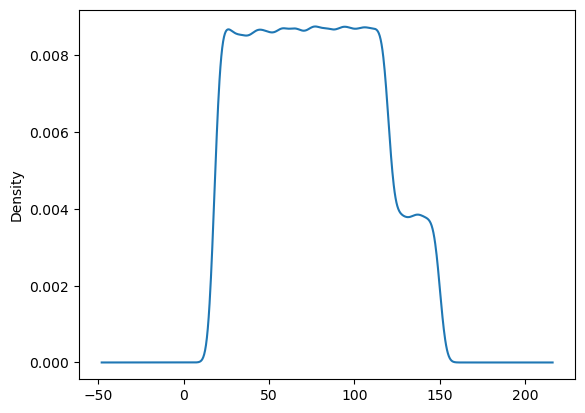

In [33]:
data.monthly_charges.plot(kind='kde')

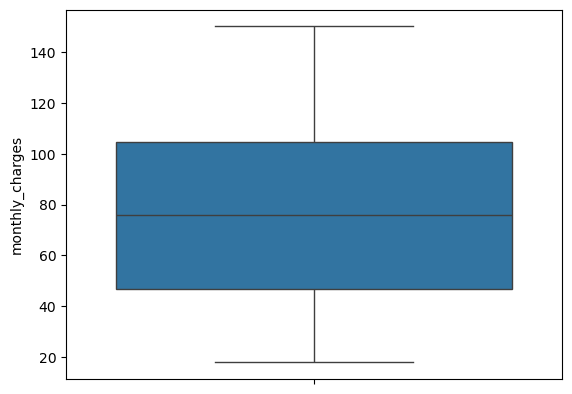

In [34]:
sns.boxplot(data.monthly_charges)
plt.show()

In [35]:
data.monthly_charges.describe()
# for floating variables value counts is not of much use for analysis

count    200000.000000
mean         76.618568
std          34.891140
min          18.000333
25%          46.902328
50%          75.754153
75%         104.441355
max         149.998856
Name: monthly_charges, dtype: float64

### Task 14: Churn rate by senior citizen status
- Question: Are senior citizens more likely to churn compared to non-senior customers? Calculate the churn rate for senior citizens vs non-senior citizens. Churn rate can be defined as the percentage of customers in that group who have churned.
- You can do this by grouping the data by senior_citizen and calculating the mean of the churn column (if churn is encoded as 0/1, the mean gives the proportion that churned).
Alternatively, use value_counts of churn within each group.

In [36]:
data.groupby('senior_citizen')['churn'].mean()

senior_citizen
False    0.501411
True     0.498721
Name: churn, dtype: float64

### Task 15: Churn rate by partner status
Question: Does having a partner influence churn? Compute the churn rate for customers with a partner vs without a partner. Similar to above, group by partner and find the proportion that churned in each group.

<Axes: xlabel='partner'>

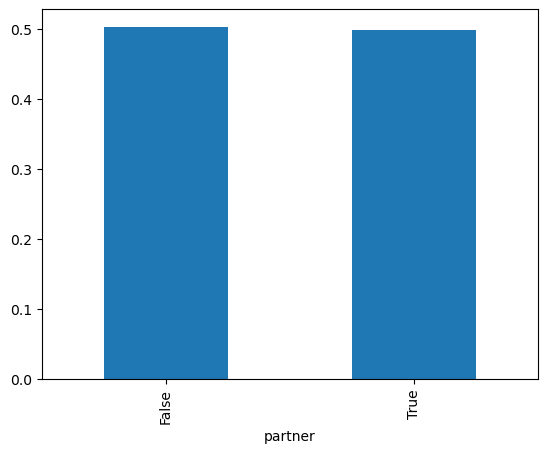

In [37]:
data.groupby('partner')['churn'].mean().plot(kind='bar')

### Task 16: Average tenure of churned vs non-churned customers
Question: Do customers who churn tend to have shorter tenures? Calculate the average tenure (in months) for churned customers vs customers who stayed. This can be done
by grouping by churn status.

<Axes: ylabel='tenure_months'>

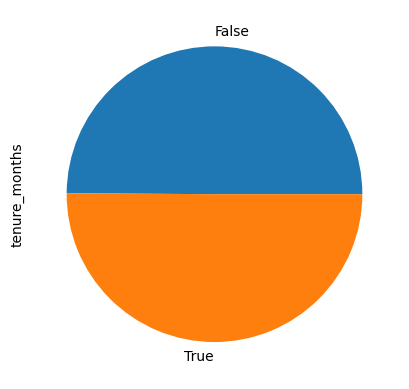

In [38]:
data.groupby('churn')['tenure_months'].mean().plot(kind='pie')

### Task 17: Average monthly charges of churned vs non-churned customers
Question: Do customers who churn pay more per month? Find the average monthly_charges for churned vs non-churned groups.

In [39]:
data.groupby('churn')['monthly_charges'].mean()

churn
False    76.601562
True     76.635570
Name: monthly_charges, dtype: float64

### Task 18: Average total charges of churned vs non-churned customers
Question: How do the total charges differ between churned and retained customers? Calculate the average total_charges for churned vs non-churned customers. (Since
total_charges is a function of monthly charges and tenure, this will reflect both how long and how much a churned customer contributed versus a stayed customer.)

In [40]:
data.groupby('churn')['total_charges'].mean()

churn
False    4005.750196
True     4006.677245
Name: total_charges, dtype: float64

### Task 19: Correlation analysis
Calculate the correlation matrix for the numeric features (and the churn indicator, encoded as 0/1). This will show how strongly features are linearly related to each other and to churn. In particular, look at correlations involving churn. Are any features strongly positively or negatively correlated with churn? Also note if any pair of features are highly correlated with each other (for instance, tenure and total_charges might be strongly correlated since longer tenure usually means more total charges).

In [41]:
corr=data.corr(numeric_only=True)
corr

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn
age,1.000000,-0.000988,0.000091,-0.000956,-0.001786,-0.001610,0.002026,0.004099,0.001627,-0.000026
senior_citizen,-0.000988,1.000000,-0.001990,-0.002299,-0.000142,-0.003850,0.003729,-0.001353,-0.002232,-0.002690
partner,0.000091,-0.001990,1.000000,-0.004810,-0.000347,0.001640,0.001040,-0.002987,0.004753,-0.004760
dependents,-0.000956,-0.002299,-0.004810,1.000000,-0.000445,-0.000411,0.002992,-0.000863,0.000091,0.003170
tenure_months,-0.001786,-0.000142,-0.000347,-0.000445,1.000000,0.001462,-0.000562,0.003022,0.000821,0.003620
phone_service,-0.001610,-0.003850,0.001640,-0.000411,0.001462,1.000000,0.003581,-0.002515,-0.000288,-0.001320
paperless_billing,0.002026,0.003729,0.001040,0.002992,-0.000562,0.003581,1.000000,0.000539,0.001884,0.001500
monthly_charges,0.004099,-0.001353,-0.002987,-0.000863,0.003022,-0.002515,0.000539,1.000000,0.003315,0.000487
total_charges,0.001627,-0.002232,0.004753,0.000091,0.000821,-0.000288,0.001884,0.003315,1.000000,0.000201
churn,-0.000026,-0.002690,-0.004760,0.003170,0.003620,-0.001320,0.001500,0.000487,0.000201,1.000000


<Axes: >

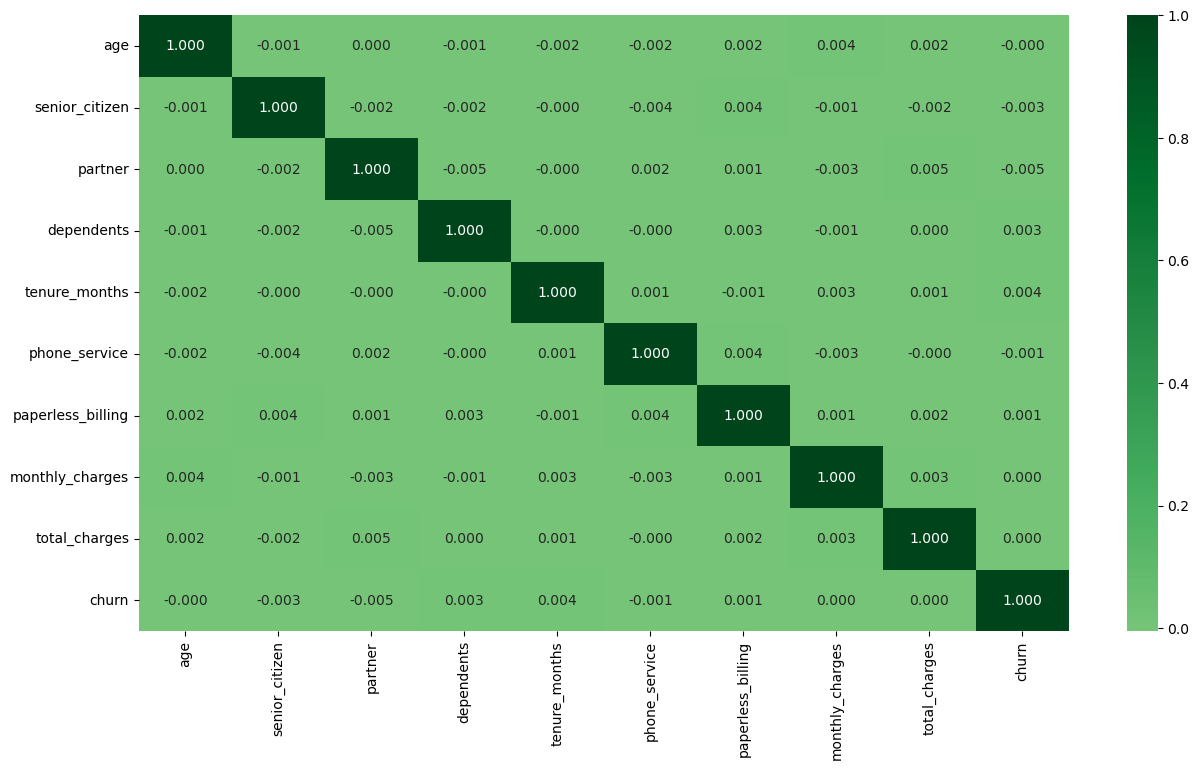

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Greens', center=0, fmt=".3f")
# Analysis: Sicne none of the feature are highly correlated to any other feature, we do not need to drop any features
# If x features a highly correlated, then keep 1 of them and drop X-1, e.g. if 7 features are highly correlated then keep ANY 1 and drop the rest.

## Outlier Detection and Treatment
- Outliers are extreme values that deviate significantly from the rest of the data. They can affect our model, especially logistic regression which could be influenced by very large or small values. We will detect outliers in key numeric columns and decide on how to handle them.

- We'll use two common methods: - Interquartile Range (IQR) method: We consider points as outliers if they fall below Q1 - 1.5/QR or above Q3 + 1.5IQR for a given feature. - Z-
score method: We calculate the z-score (standard score) for each data point in a feature. A common rule is to treat points with |z| > 3 as potential outliers (3 standard
deviations away from the mean).

- We will apply these methods to the monthly_charges (as an example numeric feature, since charges could have outliers).

### Task 20: Detect outliers in monthly_charges using the IQR method
Calculate the first quartile (Q1) and third quartile (Q3) of monthly_charges, then compute the IQR (Q3 - Q1). Determine the IQR bounds:
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 + 1.5 * IQR

Find which data points in monthly_charges lie outside these bounds. How many outliers do you detect using this rule?

In [43]:
data.monthly_charges.describe()

count    200000.000000
mean         76.618568
std          34.891140
min          18.000333
25%          46.902328
50%          75.754153
75%         104.441355
max         149.998856
Name: monthly_charges, dtype: float64

In [44]:
Q1 = data.monthly_charges.quantile(0.25)
Q3 = data.monthly_charges.quantile(0.75)

IQR = Q3-Q1
print(f"Q1: {round(Q1,2)}\nQ3: {round(Q3,2)}\nIQR: {round(IQR,2)}".format(".2f"))

Q1: 46.9
Q3: 104.44
IQR: 57.54


In [45]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(f"Lower Bound: {round(lower_bound,2)}\nUpper Bound: {round(upper_bound,2)}")

Lower Bound: -39.41
Upper Bound: 190.75


In [46]:
ul_outliers = data[data['monthly_charges'] > upper_bound].shape[0]
ll_outliers = data[data['monthly_charges']< lower_bound].shape[0]

In [47]:
print(ul_outliers, ll_outliers)

0 0


<Axes: ylabel='monthly_charges'>

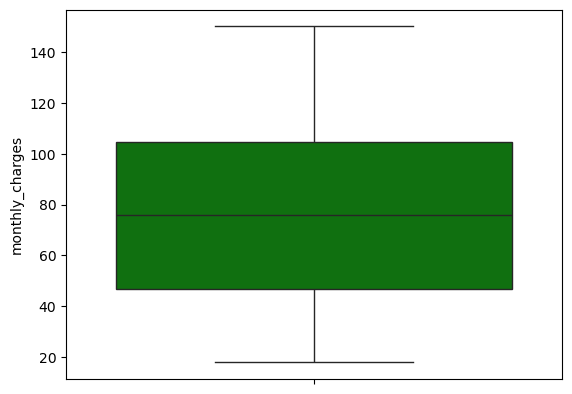

In [48]:
sns.boxplot(data.monthly_charges,color='Green')

### Task 21: Detect outliers in monthly_charges using the Z-method (This method is used when you have more than 20% as outliers uisng the IQR method)
Calculate the Mean and Standard Deviation of monthly_charges. Determine the Z-Methods bounds:
- Lower bound = MEAN - 3 * STD_DEV
- Upper bound = MEAN + 3 * STD_DEV

Find which data points in monthly_charges lie outside these bounds. How many outliers do you detect using this rule?

In [49]:
mean = np.mean(data.monthly_charges)
std = np.std(data.monthly_charges)

LL = mean - 3 * std
UL = mean + 3 * std

ul_outliers = data[data['monthly_charges'] > UL].shape[0]
ll_outliers = data[data['monthly_charges']< LL].shape[0]

print(f"Mean: {round(mean,2)} | Std Dev: {round(std,2)} | UL: {round(UL,2)} | LL: {round(LL,2)} | ul_outlier: {round(ll_outliers,2)} | ll_outliers: {round(ll_outliers,2)}")

Mean: 76.62 | Std Dev: 34.89 | UL: 181.29 | LL: -28.05 | ul_outlier: 0 | ll_outliers: 0


### Task 22: We can now, run the same analysis for other numeric(int and float) columns

`Outlier Treatment`

Decide how to handle any outliers found in monthly_charges (and any other numeric columns if you checked them). Common strategies include: - Removing the outlier rows entirely. - Capping the outliers (e.g., set values above the upper bound to the upper bound, and below the lower bound to the lower bound). - Keeping them if they are legitimate values and not overly influential.

For this analysis, if outliers exist and are very few, you might choose to remove those records for simplicity. Alternatively, if they are not extreme or numerous, you might leave them in but be aware of them.

Implement the chosen outlier treatment for monthly_charges. (If no outliers were detected by either method, you can state that no action is needed or just skip removal.)

## Data Preprocessing (Encoding, Splitting, Scaling)
Before we can feed the data into a logistic regression model, we need to prepare the features: - Convert categorical and boolean features into numeric form (encoding). - Split the data into training and test sets. - Scale/normalize features if needed, so that no single feature dominates due to scale differences (this can help the model converge faster and improve performance).

### Task 23: Encode the target variable churn as numeric

The churn column is currently in boolean (true/false) form (or Yes/No). Convert it to a numeric binary format, e.g., 1 for "Yes/True" (customer churned) and 0 for "No/False" (customer stayed). This will be our target y for modeling.

In [50]:
data.churn = data.churn.astype(int)
data.churn.sample(3)

customer_id
dee7e090-ee80-4150-acb5-fa7fc0895357    1
9f3a25f0-1269-486f-9887-2d9be7055875    1
1c14ada8-df42-4964-a04e-17089dc07ca4    0
Name: churn, dtype: int64

### Task 24: Convert other boolean columns to 0/1
Similarly, convert all other boolean columns (senior_citizen, partner, dependents, phone_service, paperless_billing) into 0/1 numeric values (if they are not already numeric). This ensures that all features are in numeric form for the model.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0f1eb305-e440-4576-9ab0-f8bdbf0bd17b to aeed3e0e-29cd-4c1f-9216-0711d42f3d7b
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   age                    200000 non-null  int64              
 1   senior_citizen         200000 non-null  bool               
 2   partner                200000 non-null  bool               
 3   dependents             200000 non-null  bool               
 4   tenure_months          200000 non-null  int64              
 5   phone_service          200000 non-null  bool               
 6   paperless_billing      200000 non-null  bool               
 7   monthly_charges        200000 non-null  float64            
 8   total_charges          200000 non-null  float64            
 9   churn                  200000 non-null  int64              
 10  last_interaction_date  200000 non-null  date

In [52]:
bool_cols = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']
data[bool_cols] = data[bool_cols].astype(int)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0f1eb305-e440-4576-9ab0-f8bdbf0bd17b to aeed3e0e-29cd-4c1f-9216-0711d42f3d7b
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   age                    200000 non-null  int64              
 1   senior_citizen         200000 non-null  int64              
 2   partner                200000 non-null  int64              
 3   dependents             200000 non-null  int64              
 4   tenure_months          200000 non-null  int64              
 5   phone_service          200000 non-null  int64              
 6   paperless_billing      200000 non-null  int64              
 7   monthly_charges        200000 non-null  float64            
 8   total_charges          200000 non-null  float64            
 9   churn                  200000 non-null  int64              
 10  last_interaction_date  200000 non-null  date

### Task 25: Extract Date Features like dayofweek, Month, Date, Year, Hour, Mins etc. and drop the timestamp col

In [54]:
data['day_of_week'] = data['last_interaction_date'].dt.weekday
data['year'] = data['last_interaction_date'].dt.year
data['month'] = data['last_interaction_date'].dt.month
data['date'] = data['last_interaction_date'].dt.day
data['hour'] = data['last_interaction_date'].dt.hour
data['minute'] = data['last_interaction_date'].dt.minute
data['second'] = data['last_interaction_date'].dt.second
data['week_of_year'] = data['last_interaction_date'].dt.isocalendar().week
data['quarter'] = data['last_interaction_date'].dt.quarter
data.drop('last_interaction_date', axis=1, inplace=True)

In [55]:
data.sample(3)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,region,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter
customer_id,,,,,,,,,,,,,,,,,,,,
de64e227-9d09-4a71-b60a-d8dc710d5205,83,0,0,1,0,0,0,74.887820,5041.168037,1,Montana,0,2024,8,5,7,52,30,32,3
e6bfb4a3-832f-48a4-98e6-268a801d59ac,86,1,1,0,15,1,0,44.081028,5852.550720,0,Ohio,5,2025,5,24,11,46,36,21,2
e42bddf3-e343-4648-983c-cb5368c8b80f,90,0,0,0,70,0,0,69.888383,1631.867860,0,Wisconsin,3,2025,6,19,9,46,51,25,2


### Task 26: One-hot encode the region column
The region column is categorical with many possible values (states or regions). We need to convert it into a numeric form. Use one-hot encoding to create dummy variables for each unique region. For example, region "Ohio" becomes a binary column that is 1 for Ohio residents and 0 otherwise, and so on for each region.

You can use pandas get_dummies function to do this. Be careful to avoid the dummy variable trap (when one dummy column is redundant because it can be inferred from
others). You can set drop_first=True to drop one of the region dummy columns, or handle it manually.

In [74]:
region_dummies = pd.get_dummies(data['region'], drop_first=True, dtype='int')

data = pd.concat([data, region_dummies], axis=1)

data.sample(3)
data.drop(columns='region', inplace=True)

In [75]:
data.to_csv('cleaned_data.csv')

### Task 27: Separate features and target variable
Now that the data is preprocessed, split the DataFrame into features (X) and target (y). - y should be the churn column (the 0/1 labels we want to predict). - X should be all the remaining columns that will serve as inputs to the model.

Make sure that X does not include the target itself or any columns we decided to drop (like IDs, emails, etc., which we already removed).

In [76]:
X = data.drop(columns='churn')
y = data.churn

### Task 28: Split data into training and testing sets
Use sklearn.model_selection.train_test_split to split the dataset into training and test sets. Typically, we might use 70% of the data for training and 30% for testing (or 80/20,etc.). Set a random_state for reproducibility.

The result should be X_train, X test, y_train, y_test.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #try stratify=y

### Task 29: Feature scaling (Standardization)
For logistic regression, it is often beneficial to scale the features so they are on comparable scales (although logistic regression can still work without scaling, scaling can improve convergence and performance, especially if regularization is used).

Use a StandardScaler (from sklearn.preprocessing) to standardize the numeric features in X. Important: Fit the scaler on the training data only, then use it to transform both the training and testing feature data. This prevents information from the test set leaking into the training process.

In [78]:
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

st = StandardScaler()
st.fit(X_train[numeric_cols])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = st.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = st.transform(X_test[numeric_cols])

## Machine Learning Models and Comparison

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]
print('Logistic Regression:')
print('Classification Report: \n',classification_report(y_test, y_pred))
print('\n\nROC-AUC Curve: \n',roc_auc_score(y_test, y_proba))
print('\n\nConfustion Matrix: \n', confusion_matrix(y_test, y_pred))

Logistic Regression:
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.46      0.48     20143
           1       0.50      0.54      0.52     19857

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



ROC-AUC Curve: 
 0.5009092102311


Confustion Matrix: 
 [[ 9240 10903]
 [ 9114 10743]]
